In [30]:
import numpy as np

# If P is a square row-stochastic matrix, returns the 
# normalized (sum 1) eigenvector associated with the 
# unit eigenvalue.
#
# For Markov chains with state transition probability 
# matrix P, this vector gives the steady state 
# distribution over the states.
#
# If P does not have a unit eigenvalue, returns None.
# However, sensible results are not guaranteed for
# arbitrary matrices.

def getSteadyStateDist(P):
    
    tolerance = 1e-10
    
    # need the left eigenvectors
    [u,v] = np.linalg.eig(np.transpose(P))
    v = np.transpose(v)
    
    index = 0
    for i in u:
        if np.abs(i - 1.) < tolerance:
            return np.real(v[index,:] / np.sum(v[index,:]))
        index += 1
        
    return None 

In [31]:
#method definition for transition matrix P and trajectory probabilities
import numpy as np
import math

def transitionmatrix(xt,q12,q23,q31,deltat,extrat):
    P=np.zeros((3,3))
    q12x1=xt*q12
    R1=-1*q12x1
    R2 = -1*q23
    R3 = -1*q31
    Q=np.zeros((3,3))
    
    Q = np.array([[R1, q12x1*extrat, 0],
                  [0, R2, q23],
                  [q31, 0, R3]])
    I=np.eye(3)
    P=I+deltat*Q
    return P
def trajprob(P,steadystate,pb):
    
    T=np.array([P[:,0],P[:,1],P[:,2]])
#T0=np.array([P0[:,0],P0[:,1],P0[:,2]])


    rows=len(T)
    cols=len(P[0])
    index=0
    for i in range(rows):
        j=0
        while(j<=(cols-1)):
            #pb0[index,:]= steadystate[i]*((P0[i,j]*T0[:,j]))
            pb[index,:]= steadystate[i]*((P[i,j]*T[:,j]))
            j=j+1
            index=index+1

    pbcol= np.array([pb]).reshape(27,1)
    return pbcol   

def pbx1givenseq(pbseqgivenx1,pbseqgivenx0,px1,px0):
    
    totalprob=(pbseqgivenx1*px1)+(pbseqgivenx0*px0)
    pbx1giventraj=(pbseqgivenx1 *px1)/totalprob
    return pbx1giventraj

def pbx0givenseq(pbseqgivenx1,pbseqgivenx0,px1,px0):    
   
    totalprob=(pbseqgivenx1*px1)+(pbseqgivenx0*px0)
    pbx0giventraj=(pbseqgivenx0 *px0)/totalprob
    return pbx0giventraj

In [32]:
q12 = 5e3
q23 = 50
q31=17


def ratematrix(xt,q12,q23,q31):
    q12x1=xt*q12
    R1=-1*q12x1
    R2 = -1*q23
    R3 = -1*q31
    Q=np.zeros((3,3))
    
    Q = np.array([[R1, q12x1, 0],
                  [0, R2, q23],
                  [q31, 0, R3]])
    return Q

# Gillespie

In [ ]:
import numpy as np
import math
import random
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
#fig,ax=plt.subplots(dpi=100)
#fig2,ax2=plt.subplots(dpi=100)

t=[0]
tend =100
xtd=100
q12 = 5e3
q23 = 50
q31=17
nofiteration=0

firstcycle_COD='False'

cc1=[0]
co1=[0]
oo1=[0]
od1=[0]
dd1=[0]
dc1=[0]



state = {
    0: "C",
    1: "O",
    2: "D"
}


Q = ratematrix(xtd,q12,q23,q31)
rates = [Q[0][1],Q[1][2],Q[2][0]]
rate_sum= sum(rates)

curr_state=0
currentstatelist=[state[curr_state]]
#print(state[curr_state], "->", end=" ")

#while (t[-1] < tend and firstcycle_COD=='False'):
while(firstcycle_COD == 'False'):
#while(t[-1]<tend):
    
    nofiteration=nofiteration+1
    if (rate_sum ==0):
        break
        
    tau=np.random.exponential(scale=1/rate_sum)
    t.append(t[-1]+tau)
    
    rand=random.uniform(0,1)
    
    if (curr_state==0):
        if(rand*rate_sum <= rates[0]):
            curr_state = 1
            currentstatelist.append(state[curr_state])
            co1.append(co1[-1]+1)
            cc1.append(cc1[-1])
            od1.append(od1[-1])
            oo1.append(oo1[-1])
            dc1.append(dc1[-1])
            dd1.append(dd1[-1])
        else:
            curr_state=0
            currentstatelist.append(state[curr_state])
            
            cc1.append(cc1[-1]+1)
            co1.append(co1[-1])
            od1.append(od1[-1])
            oo1.append(oo1[-1])
            dc1.append(dc1[-1])
            dd1.append(dd1[-1])
            
    elif(curr_state==1):
        if(rand*rate_sum <= rates[1]):
            curr_state = 2
            currentstatelist.append(state[curr_state])
            od1.append(od1[-1]+1)
            co1.append(co1[-1])
            cc1.append(cc1[-1])
            oo1.append(oo1[-1])
            dc1.append(dc1[-1])
            dd1.append(dd1[-1])
        
        else:
            curr_state=1
            currentstatelist.append(state[curr_state])
            oo1.append(oo1[-1]+1)
            co1.append(co1[-1])
            cc1.append(cc1[-1])
            od1.append(od1[-1])
            dc1.append(dc1[-1])
            dd1.append(dd1[-1])
            
    elif(curr_state==2):
        if(rand*rate_sum <= rates[2]):
            curr_state = 0
            currentstatelist.append(state[curr_state])
            dc1.append(dc1[-1]+1)
            co1.append(co1[-1])
            cc1.append(cc1[-1])
            od1.append(od1[-1])
            oo1.append(oo1[-1])
            dd1.append(dd1[-1])
            
            firstcycle_COD = 'True'
        else:
            curr_state=2
            currentstatelist.append(state[curr_state])
            dd1.append(dd1[-1]+1)
            co1.append(co1[-1])
            cc1.append(cc1[-1])
            od1.append(od1[-1])
            oo1.append(oo1[-1])
            dc1.append(dc1[-1])
            
            
#c_cplot= ax.plot(t,cc1,label='Remain in C state') 
#c_oplot=ax.plot(t,co1,label = 'C to O transition')
#o_oplot= ax.plot(t,oo1,label='Remain in O state') 
#o_dplot=ax.plot(t,od1,label = 'O to D transition')
#d_dplot= ax.plot(t,dd1,label='Remain in D state') 
#d_cplot=ax.plot(t,dc1,label = 'D to C transition')

#plt.legend()



#ax.set_xlabel("time")
#ax.set_ylabel('state conditions')
print(t[-1])
print(nofiteration)


# Gillespie with n chr2
# we will find out number of iteration and total time chr2 take to complete one cycle. 
#number of iterations are used to estimate wait time for transmitter

In [ ]:
import numpy as np
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

sns.set_style("whitegrid")

nsimulations=10000
iterationforeach=[]
totaltimemore=[]
#def gillespie(start_state,xtd1,nstate):
for num in range(nsimulations):
    
    
    t_co=[]
    t_od=[]
    t_dc=[]
    t=[0]

    #tend =nstate-1
    xtd= 100
    q12 = 5e3
    q23 = 50
    q31=17
    nofiteration=0

    firstcycle_COD='False'
    

    state = {
       0: "C",
       1: "O",
       2: "D"
    }


    Q = ratematrix(xtd,q12,q23,q31)
    rates = [Q[0][1],Q[1][2],Q[2][0]]
    rate_sum= sum(rates)

    curr_state=0
    currentstatelist=[state[curr_state]]
#print(state[curr_state], "->", end=" ")

    #for i in range(tend):
    while(firstcycle_COD == 'False'):  
    
        if (rate_sum ==0):
            break
        
        nofiteration=nofiteration+1
        tau=np.random.exponential(scale=1/rate_sum)
        t.append(t[-1]+tau)
    
        rand=random.uniform(0,1)
        rand2=random.uniform(0,1)
        rand3=random.uniform(0,1)
        rand4=random.uniform(0,1)
        rand5=random.uniform(0,1)
        rand6=random.uniform(0,1)
    
        if (curr_state==0):
            if(rand*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                
                t_co.append(t[-1])
                
            elif(rand2*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                
                t_co.append(t[-1])    
                
            elif(rand3*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                
                t_co.append(t[-1])    
            
            elif(rand4*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                
                t_co.append(t[-1]) 
                
            elif(rand5*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                
                t_co.append(t[-1])   
                
            elif(rand6*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                
                t_co.append(t[-1])      
            
                   
            else:
                curr_state=0
                currentstatelist.append(state[curr_state])
            
                
            
        elif(curr_state==1):
            if(rand*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                
                t_od.append(t[-1])
                
            elif (rand2*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                
                t_od.append(t[-1])
                
            elif (rand3*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                
                t_od.append(t[-1]) 
                
            elif (rand4*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                
                t_od.append(t[-1]) 
                
            elif (rand5*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                
                t_od.append(t[-1])   
                
            elif (rand6*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                
                t_od.append(t[-1])    
        
            else:
                curr_state=1
                currentstatelist.append(state[curr_state])
                
            
        elif(curr_state==2):
            if(rand*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                
            
                firstcycle_COD = 'True'
                t_dc.append(t[-1])
            
            elif (rand2*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                
                
                firstcycle_COD = 'True'
                t_dc.append(t[-1])
                
            elif (rand3*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                
                
                firstcycle_COD = 'True'
                t_dc.append(t[-1]) 
                
            elif (rand4*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                
                
                firstcycle_COD = 'True'
                t_dc.append(t[-1]) 
                
            elif (rand5*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                
                firstcycle_COD = 'True'
                t_dc.append(t[-1]) 
                
            elif (rand6*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                
                
                firstcycle_COD = 'True'
                t_dc.append(t[-1])            
                
            else:
                curr_state=2
                currentstatelist.append(state[curr_state])
    totaltimemore.append(t[-1])  
    iterationforeach.append(nofiteration)

tt=np.mean(totaltimemore) 
niteration=np.mean(iterationforeach)

print(tt) 
print(niteration)
            
                                      

In [ ]:
#sns.histplot(iterationforeach)
print(stats.mode(iterationforeach))

In [ ]:
print(np.max(totaltimemore))
print(np.min(iterationforeach))

# Gillespie  average time

In [49]:
import numpy as np
import math
import random
import matplotlib
#matplotlib.use('tkagg')
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
#fig,ax=plt.subplots(dpi=100)
#fig2,ax2=plt.subplots(dpi=100)


totaltime=[]
t_co1=[]
t_od1=[]
t_dc1=[]

tend =1000
xtd=100
q12 = 5e3
q23 = 50
q31=17



cc1=[0]
co1=[0]
oo1=[0]
od1=[0]
dd1=[0]
dc1=[0]




state = {
    0: "C",
    1: "O",
    2: "D"
}


Q = ratematrix(xtd,q12,q23,q31)
rates = [Q[0][1],Q[1][2],Q[2][0]]
rate_sum= sum(rates)



#print(state[curr_state], "->", end=" ")

for i in range(tend):
    curr_state=0
    firstcycle_COD='False'
    tod='False'
    t=[0]
    
    #while (t[-1] < tend and firstcycle_COD=='False'):
    
    currentstatelist=[state[curr_state]]
    
    while(firstcycle_COD == 'False'):
        
     #while(t[-1]<tend):
    
        if (rate_sum ==0):
            break
        
        tau=np.random.exponential(scale=1/rate_sum)
        t.append(t[-1]+tau)
    
        rand=random.uniform(0,1)
        rand2=random.uniform(0,1)
    
        if (curr_state==0):
            #Q = ratematrix(xtd,q12,q23,q31)
            #rates = [Q[0][1],Q[1][2],Q[2][0]]
            #rate_sum= sum(rates)
            if(rand*rate_sum <= rates[0]):
                curr_state = 1
                currentstatelist.append(state[curr_state])
                co1.append(co1[-1]+1)
                cc1.append(cc1[-1])
                od1.append(od1[-1])
                oo1.append(oo1[-1])
                dc1.append(dc1[-1])
                dd1.append(dd1[-1])
                t_co1.append(t[-1])
            else:
                curr_state=0
                currentstatelist.append(state[curr_state])
            
                cc1.append(cc1[-1]+1)
                co1.append(co1[-1])
                od1.append(od1[-1])
                oo1.append(oo1[-1])
                dc1.append(dc1[-1])
                dd1.append(dd1[-1])
            
        elif(curr_state==1):
            #Q = ratematrix(0,q12,q23,q31)
            #rates = [Q[0][1],Q[1][2],Q[2][0]]
            #rate_sum= sum(rates)
            if(rand*rate_sum <= rates[1]):
                curr_state = 2
                currentstatelist.append(state[curr_state])
                od1.append(od1[-1]+1)
                co1.append(co1[-1])
                cc1.append(cc1[-1])
                oo1.append(oo1[-1])
                dc1.append(dc1[-1])
                dd1.append(dd1[-1])
                t_od1.append(t[-1])
                tod='True'
        
            else:
                curr_state=1
                currentstatelist.append(state[curr_state])
                oo1.append(oo1[-1]+1)
                co1.append(co1[-1])
                cc1.append(cc1[-1])
                od1.append(od1[-1])
                dc1.append(dc1[-1])
                dd1.append(dd1[-1])
            
        elif(curr_state==2):
            if(rand*rate_sum <= rates[2]):
                curr_state = 0
                currentstatelist.append(state[curr_state])
                dc1.append(dc1[-1]+1)
                co1.append(co1[-1])
                cc1.append(cc1[-1])
                od1.append(od1[-1])
                oo1.append(oo1[-1])
                dd1.append(dd1[-1])
            
                firstcycle_COD = 'True'
                t_dc1.append(t[-1])
            else:
                curr_state=2
                currentstatelist.append(state[curr_state])
                dd1.append(dd1[-1]+1)
                co1.append(co1[-1])
                cc1.append(cc1[-1])
                od1.append(od1[-1])
                oo1.append(oo1[-1])
                dc1.append(dc1[-1])
                
        
                      
            
    totaltime.append(t[-1])        
#c_cplot= ax.plot(t,cc1,label='Remain in C state') 
#c_oplot=ax.plot(t,co1,label = 'C to O transition')
#o_oplot= ax.plot(t,oo1,label='Remain in O state') 
#o_dplot=ax.plot(t,od1,label = 'O to D transition')
#d_dplot= ax.plot(t,dd1,label='Remain in D state') 
#d_cplot=ax.plot(t,dc1,label = 'D to C transition')

#plt.legend()



#ax.set_xlabel("time")
#ax.set_ylabel('state conditions')
print(t[-1])



0.012667038756504682


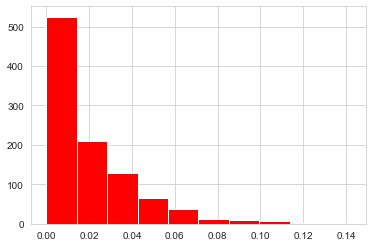

In [34]:
#o to d transition when input xt is 0
plt.hist(totaltime,color='red');

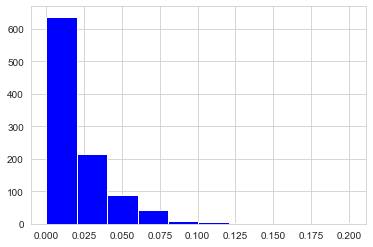

In [5]:
#o to d transition when input xt is 100
plt.hist(totaltime,color='blue');

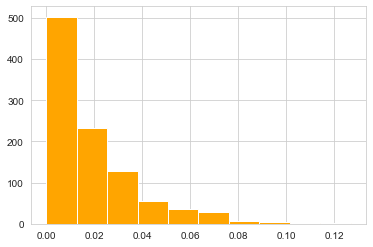

In [24]:
#o to d transition when input xt is 100
plt.hist(totaltime,color='orange');

In [25]:
print(curr_state)
#sns.distplot(t_co, hist=True, kde=True,bins=20, color = 'darkblue', hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4});


2


In [29]:
for i in range(1):
    Q = ratematrix(0,q12,q23,q31)
    rand=random.uniform(0,1)
    rates = [Q[0][1],Q[1][2],Q[2][0]]
    rate_sum= sum(rates)
    tau=np.random.exponential(scale=1/rate_sum)
    #print(Q)
    #print(rates)
    print(rate_sum)
    #print(tau)
    print(rand)
    print(rand*rate_sum)
    if (rand*rate_sum <= rates[1]):
        print("true")

67.0
0.03799466196984935
2.5456423519799065
true
